## Examining Traffic Sign Data

link to data: https://data.wprdc.org/dataset/city-traffic-signs/resource/d078a6b5-83a3-4723-a3a9-5371cfe1cc0c

According to the CDC, car accidents are the leading cause of death in the United States for people aged 1-54

First, we'll start by looking at the number of traffic signs in each neighborhood.

Let's start by importing pandas and numpy...

In [24]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

Now that we imported the needed tools to examine the data, we can read in the data from the traffic sign csv file...

In [8]:
#Read in Traffic_Signs data from file
import pandas as pd
traffic_data = pd.read_csv("Traffic_Signs.csv")
#Show Traffic_Signs data set
traffic_data

,id,mutcd_code,address_number,street,city,mounting_fixture,date_installed,description,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1673225887,R1-1,900,California Ave,Pittsburgh,Wood Pole,NaN,Stop,California-Kirkbride,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-9,40.459325,-80.019057
1,668379452,R1-1,107,Glenbury St,Pittsburgh,Channel,NaN,Stop,Overbrook,4.0,32.0,4.200332e+10,5.0,32.0,3.0,4-25,40.386955,-80.002161
2,174468442,R1-1,5325,Forbes Ave,Pittsburgh,Wood Pole,NaN,Stop,Squirrel Hill North,8.0,14.0,4.200314e+10,3.0,14.0,4.0,2-8,40.439828,-79.934814
3,1517107112,R1-1,1437,N St Clair St,Pittsburgh,Channel,NaN,Stop,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478685,-79.919270
4,1374142598,WF,228,Isabella St,Pittsburgh,Metal Pole,1995-02-14,Wayfinding Signage,North Shore,1.0,22.0,4.200356e+10,6.0,22.0,1.0,1-20,40.448482,-80.000671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74706,137646049,210,715,E Carson St,Pittsburgh,Metal Pole,NaN,Pay Parking,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428686,-79.991666
74707,261881880,PS-Snow,756,E Carson St,Pittsburgh,Metal Pole,NaN,Emergency Snow Route,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428601,-79.991250
74708,567930755,R4-11,754,E Carson St,Pittsburgh,Metal Pole,NaN,Bicycles May Use Full Lane,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428593,-79.991261
74709,1561469039,2,727,E Carson St,Pittsburgh,Channel,NaN,No Parking Anytime,South Side Flats,3.0,17.0,4.200317e+10,3.0,17.0,3.0,4-2,40.428701,-79.991235


Now that we have imported all of the playground data, we need to only look at the parts that we need. The parts that are important in determining which neighborhood has the most playgrounds is the park the playground is located in and the neigborhood the playground is located in. We can look at this by using .loc

In [10]:
#Pulls only the data we need from playground_data
traffic_data = traffic_data.loc[:, ["id", "neighborhood"]]
#Displays the new playground_data
traffic_data

,id,neighborhood
0,1673225887,California-Kirkbride
1,668379452,Overbrook
2,174468442,Squirrel Hill North
3,1517107112,Highland Park
4,1374142598,North Shore
...,...,...
74706,137646049,South Side Flats
74707,261881880,South Side Flats
74708,567930755,South Side Flats
74709,1561469039,South Side Flats


Now that we have only the necessary data to analyze the number of traffic stops, we can use value_counts to count the number of
times each neighborhood appears in the data. Each time a neighborhood appears in the data that means there is a playground there. So value_counts will find the number of playgrounds located in each neighborhood. We can then convert that to a data frame to make it easier to use.

In [11]:
#Finds the number of traffic stops in each neighborhood and store as a data frame
num_traffic_stops = traffic_data.value_counts("neighborhood")[:].to_frame()
#Displays the number of playgrounds in each neighborhood
num_traffic_stops

,0
neighborhood,
South Side Flats,3672
Bloomfield,3627
Central Business District,3491
Shadyside,3370
Squirrel Hill South,3281
...,...
Ridgemont,62
Chartiers City,44
Glen Hazel,38


Looking at the data above, we can see that there are many neighborhoods that have only one playground. Since we are looking for the neighborhoods that have the most playgrounds, we can narrow down our data to neighborhoods that have at least 3 or more playgrounds...

In [13]:
# Gets rid of the neighborhoods that don't have at least 3,000 traffic stops
num_traffic_stops = num_traffic_stops[num_traffic_stops[0]>=3000]
# Displays the number of playgrounds per neighborhood
num_traffic_stops

,0
neighborhood,
South Side Flats,3672
Bloomfield,3627
Central Business District,3491
Shadyside,3370
Squirrel Hill South,3281


That looks much better! Now that we finally have the neighborhoods that contain the most traffic stops we can use this data to create a bar graph and better visualize our data. 

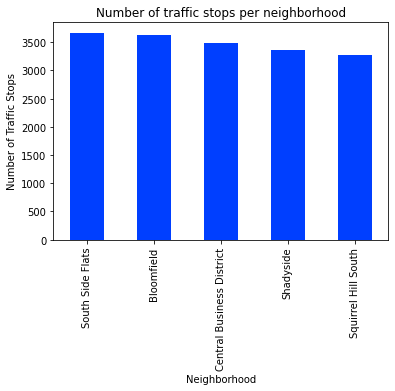

In [17]:
import matplotlib.pyplot as plt
# Sets the style
plt.style.use('seaborn-bright')
# Plots the data
num_traffic_stops.plot(kind="bar", title = "Number of traffic stops per neighborhood", xlabel = "Neighborhood", 
                     ylabel = "Number of Traffic Stops", legend =False)


Based on this information we can gather that the "South Side Flats" neighborhood has the most traffic stops. However, this is only one metric. We will need to look at the rest of our data on the neighborhoods before coming to a final decision on which is the best!